In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'A'],
    'Age': [23, 30, 25, 28, 22, 35, 24, 32, 26, 27],
    'Spending_Score': [85, 70, 75, 95, 60, 80, 82, 78, 90, 88]
}

df = pd.DataFrame(data)

df

,Gender,Category,Age,Spending_Score
0,Male,A,23,85
1,Female,B,30,70
2,Male,A,25,75
3,Female,C,28,95
4,Male,B,22,60
5,Female,C,35,80
6,Male,A,24,82
7,Female,B,32,78
8,Male,C,26,90
9,Female,A,27,88


In [ ]:

contingency_table = pd.crosstab(df['Gender'], df['Category'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

if p_val < 0.05:
    print("There is a significant association between Gender and Category.")
else:
    print("There is no significant association between Gender and Category.")


Chi-Square Statistic: 1.6666666666666667
P-value: 0.4345982085070783
Degrees of Freedom: 2
Expected Frequencies Table:
[[2.  1.5 1.5]
 [2.  1.5 1.5]]
There is no significant association between Gender and Category.


              sum_sq   df         F    PR(>F)
Category  573.766667  2.0  5.393509  0.038237
Residual  372.333333  7.0       NaN       NaN
There is a significant difference in Spending Score across Categories.


C:\Users\hp\AppData\Local\Temp\ipykernel_7384\2413219509.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


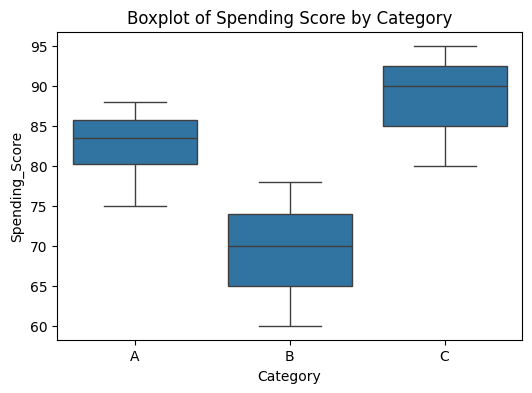

In [ ]:

anova_result = smf.ols('Spending_Score ~ Category', data=df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)

print(anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    print("There is a significant difference in Spending Score across Categories.")
else:
    print("There is no significant difference in Spending Score across Categories.")

plt.figure(figsize=(6, 4))
sns.boxplot(x='Category', y='Spending_Score', data=df)
plt.title("Boxplot of Spending Score by Category")
plt.show()


Correlation between Age and Spending Score: 0.12696418597506726


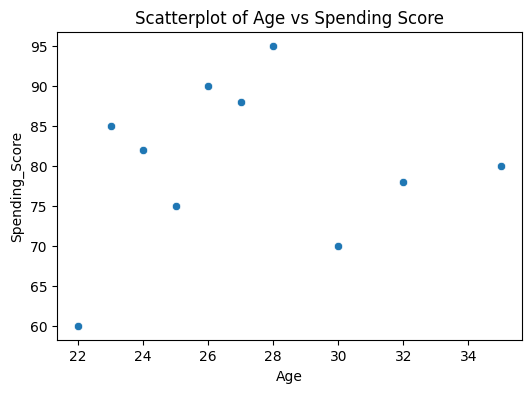

There is a weak correlation between Age and Spending Score.


In [ ]:
# Calculate the correlation between 'Age' and 'Spending_Score'
correlation = df['Age'].corr(df['Spending_Score'])

print(f"Correlation between Age and Spending Score: {correlation}")

# Visualize with scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Spending_Score', data=df)
plt.title("Scatterplot of Age vs Spending Score")
plt.show()

# Interpretation
if abs(correlation) > 0.5:
    print("There is a strong correlation between Age and Spending Score.")
else:
    print("There is a weak correlation between Age and Spending Score.")
